In [7]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [11]:
MAIN_PATH = r'C:\Users\Utkarsha\Documents\ML'
data = pd.read_csv(MAIN_PATH +'\\bank.csv')
term_deposits = data.copy()
# Have a grasp of how our data looks.
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [13]:
data.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_1204\2665406769.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



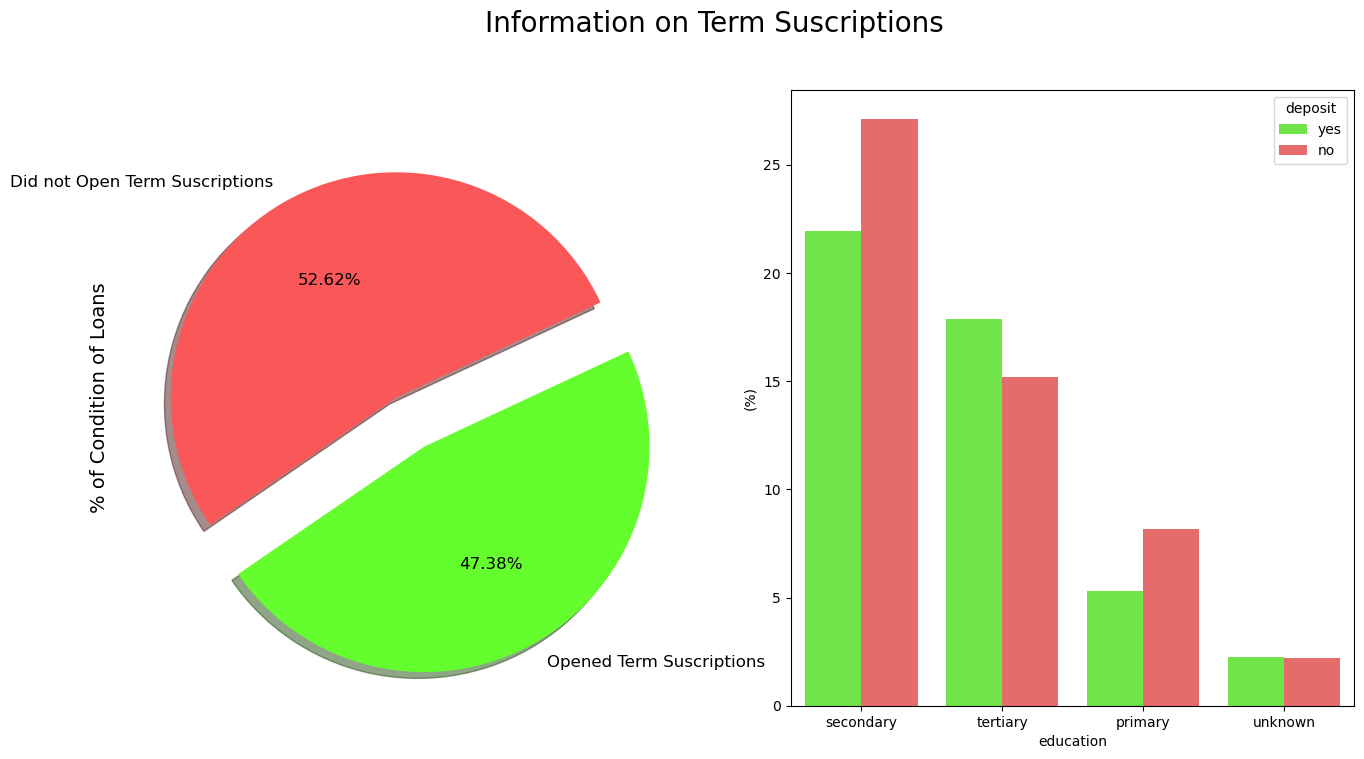

In [17]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

data["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=data, palette=palette, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(data["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

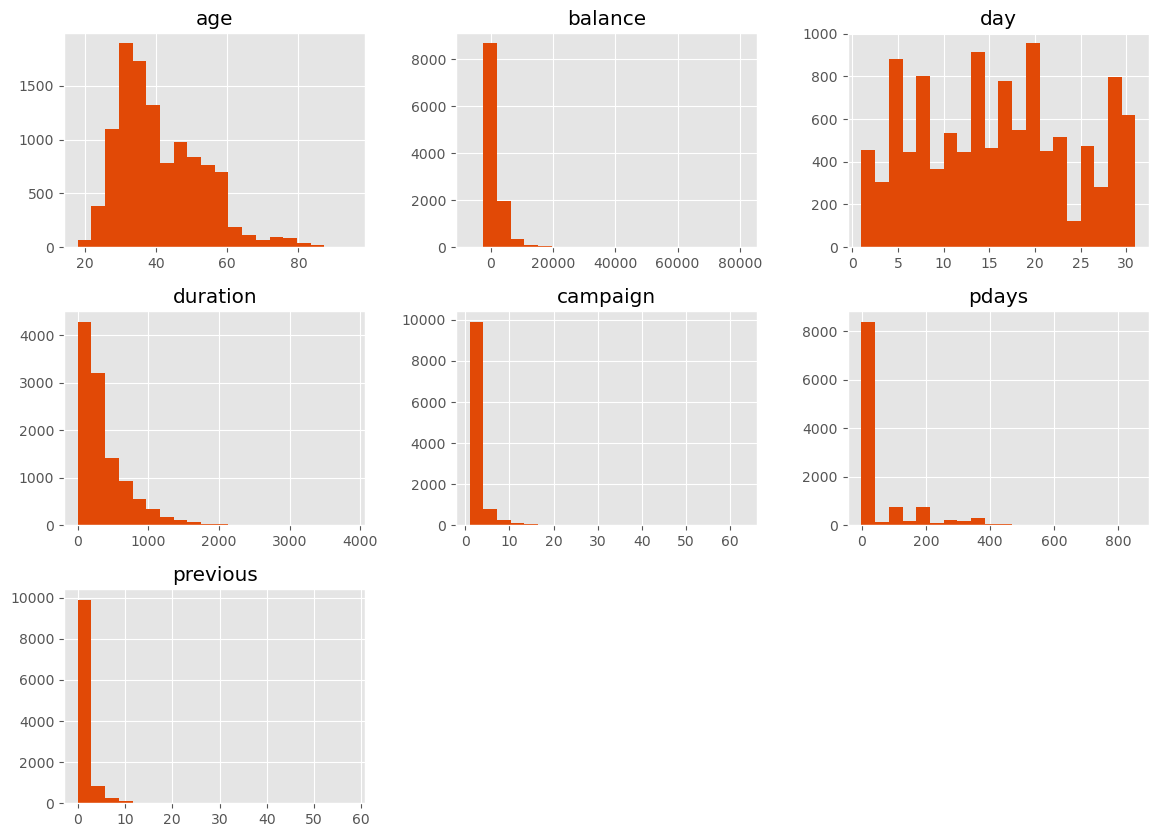

In [18]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [19]:
data['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_1204\3469080193.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



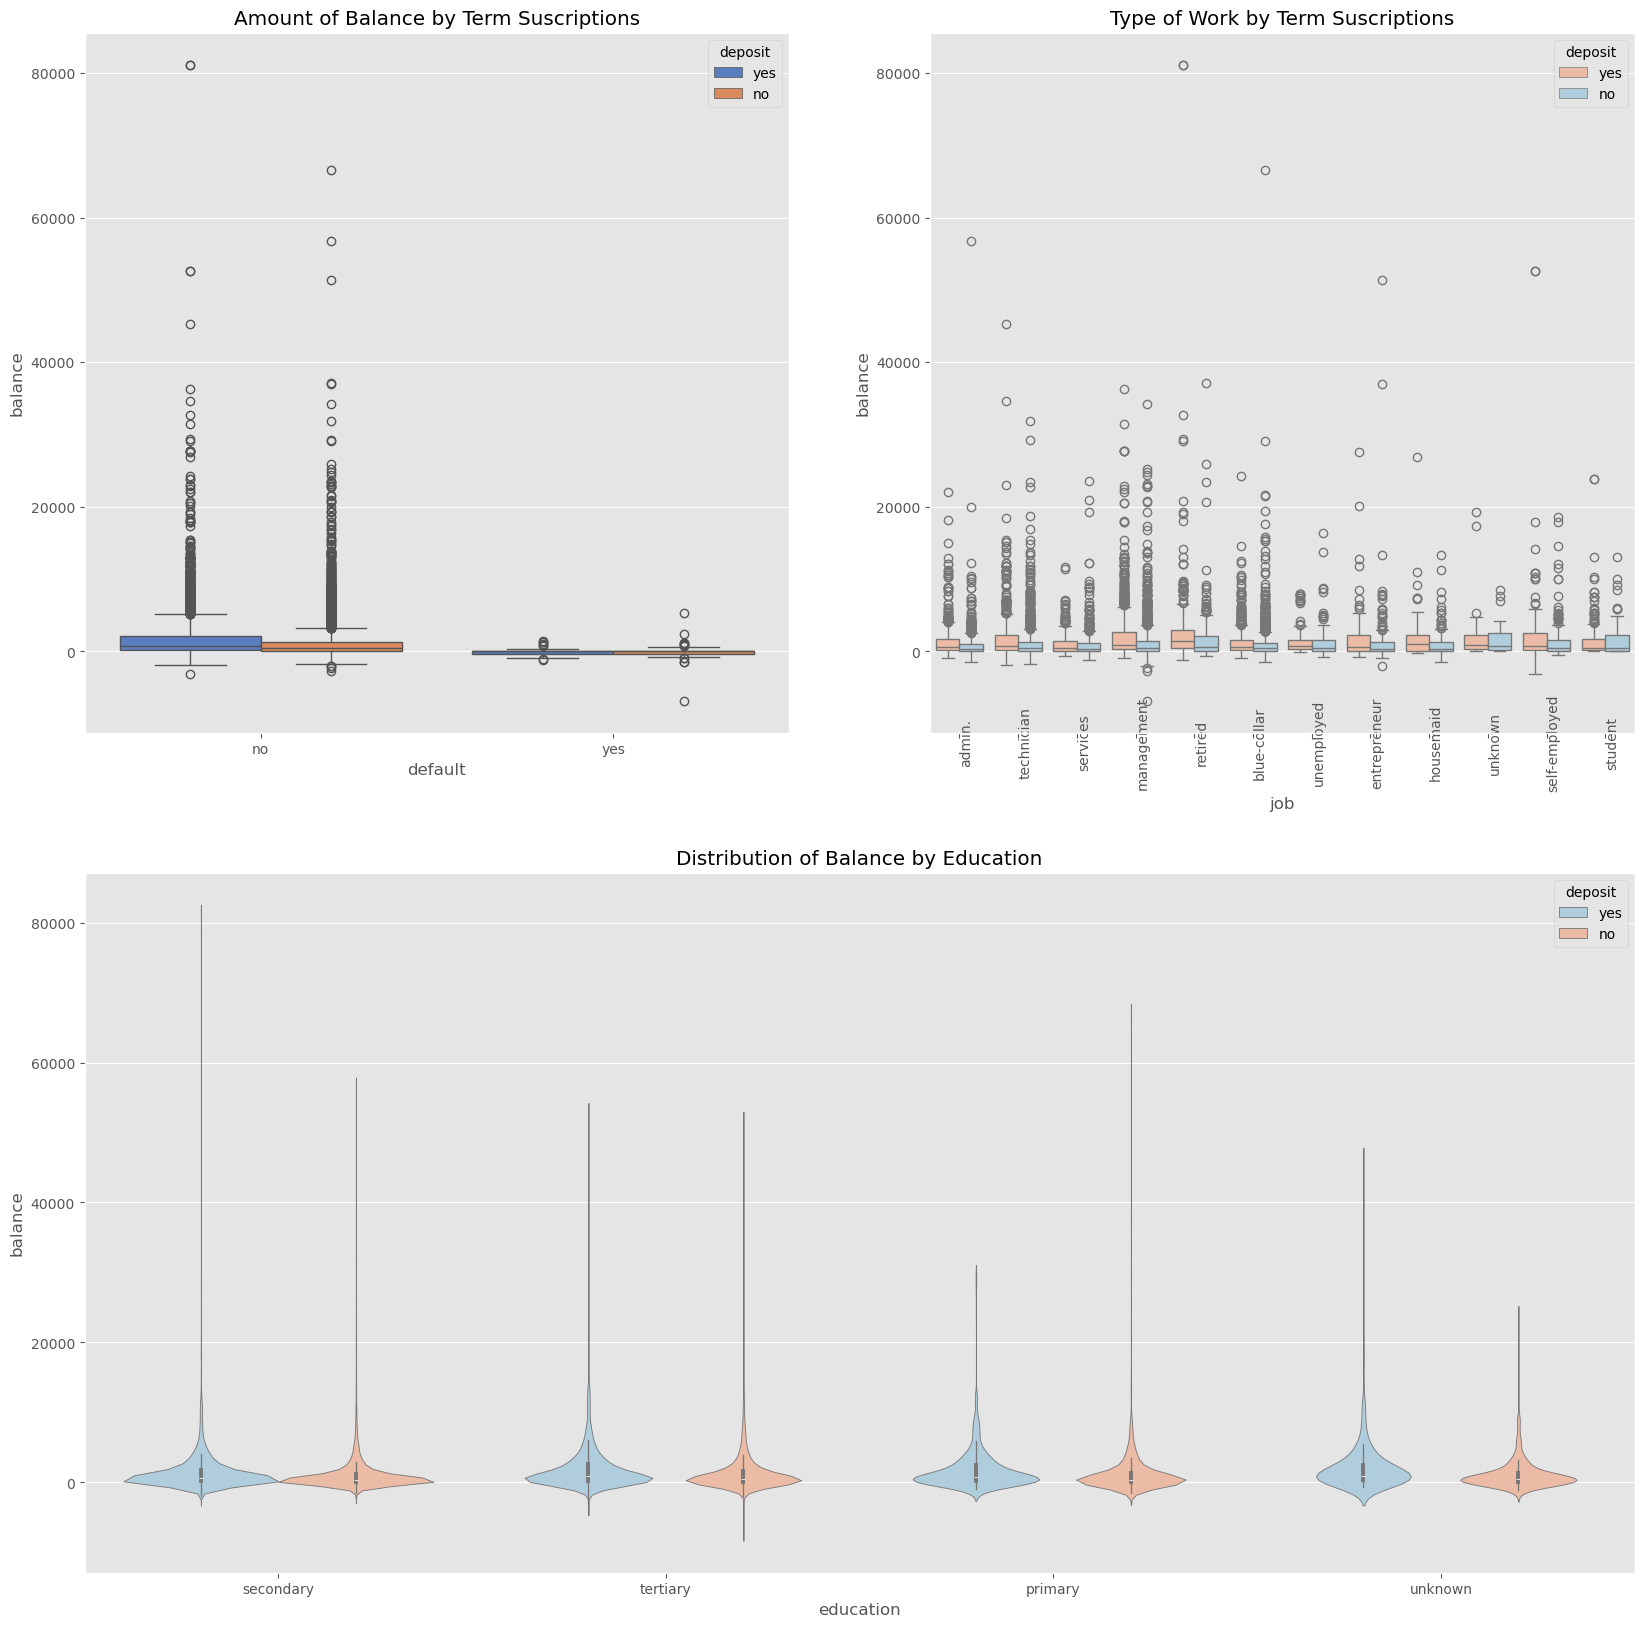

In [21]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=data, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=data, palette="RdBu", ax=ax2)

g1.set_xticklabels(data["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=data, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [22]:
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

### Analysis by Occupation:
Number of Occupations: Management is the occupation that is more prevalent in this dataset.
Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.

In [28]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [30]:
import squarify
data = data.drop(data.loc[data["balance"] == 0].index)


x = 0
y = 0
width = 100
height = 100

job_names = data['job'].value_counts().index
values = data['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

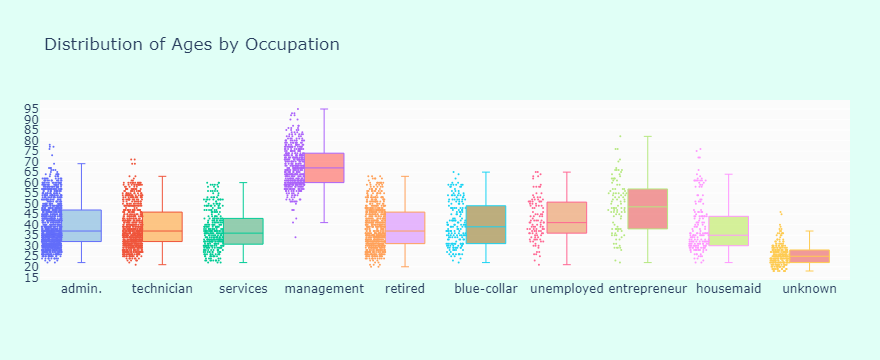

In [31]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_data = data.loc[data["deposit"] == "yes"]

occupations = data["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_data["age"].loc[suscribed_data["job"] == "management"].values
technician = suscribed_data["age"].loc[suscribed_data["job"] == "technician"].values
services = suscribed_data["age"].loc[suscribed_data["job"] == "services"].values
retired = suscribed_data["age"].loc[suscribed_data["job"] == "retired"].values
blue_collar = suscribed_data["age"].loc[suscribed_data["job"] == "blue-collar"].values
unemployed = suscribed_data["age"].loc[suscribed_data["job"] == "unemployed"].values
entrepreneur = suscribed_data["age"].loc[suscribed_data["job"] == "entrepreneur"].values
housemaid = suscribed_data["age"].loc[suscribed_data["job"] == "housemaid"].values
self_employed = suscribed_data["age"].loc[suscribed_data["job"] == "self-employed"].values
student = suscribed_data["age"].loc[suscribed_data["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [32]:
data['marital'].value_counts()

marital
married     5862
single      3351
divorced    1175
Name: count, dtype: int64

In [36]:
data['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [38]:
data['marital'].value_counts().tolist()

[5862, 3351, 1175]

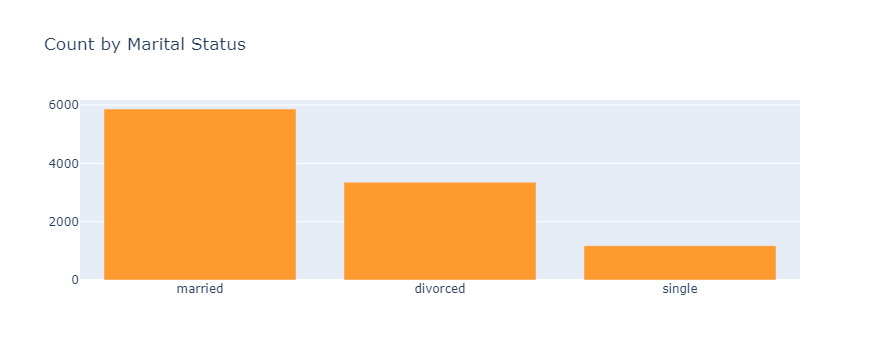

In [40]:
vals = data['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [42]:
data = pd.DataFrame(data)

In [44]:
print(data.columns)

RangeIndex(start=0, stop=75, step=1)


In [46]:
data = pd.read_csv('bank.csv')
print(data.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


C:\Users\Utkarsha\anaconda3\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



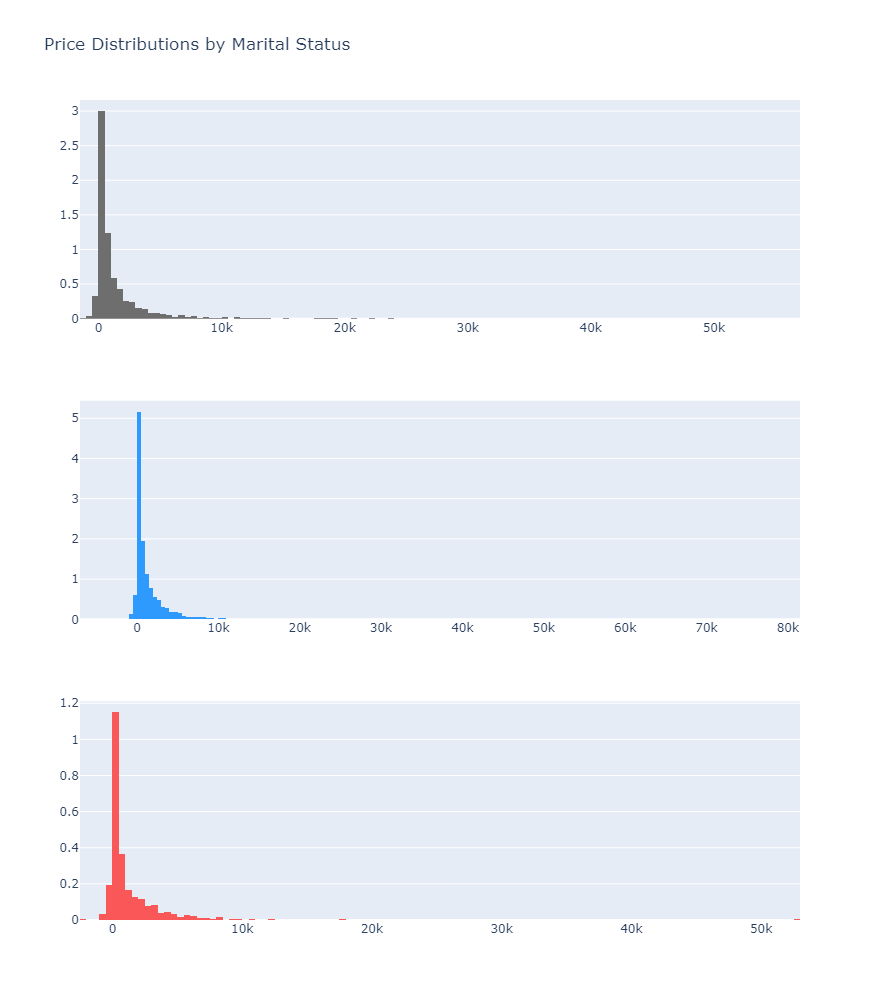

In [48]:
# Distribution of Balances by Marital status
single = data['balance'].loc[data['marital'] == 'single'].values

married = data['balance'].loc[data['marital'] == 'married'].values
divorced = data['balance'].loc[data['marital'] == 'divorced'].values

single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [50]:
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

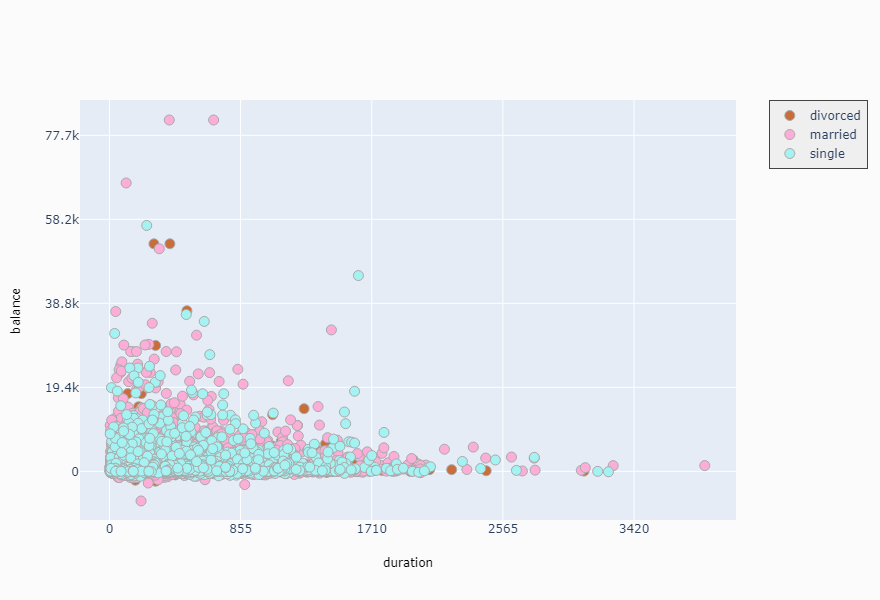

In [52]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    data,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

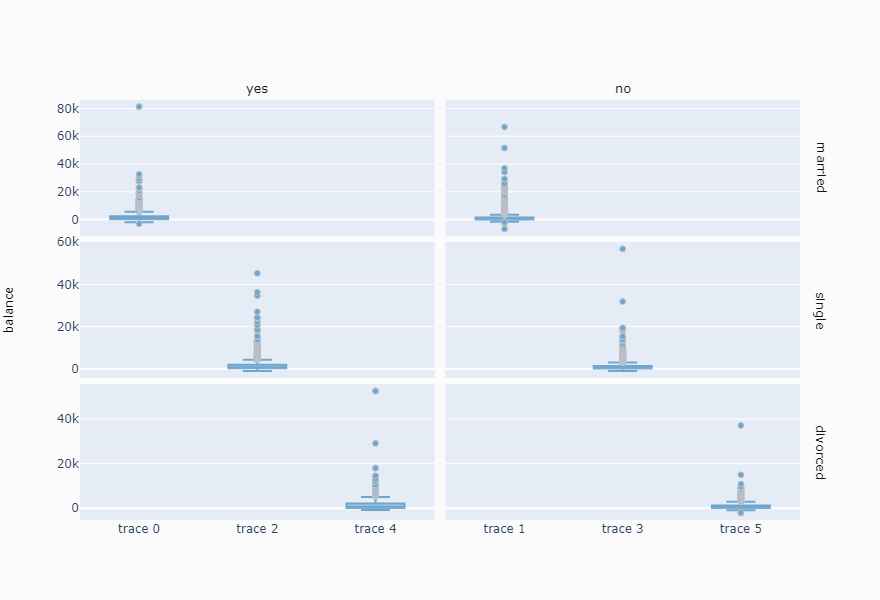

In [53]:
# Hmmm We have missed some important clients with some high balances. 
# This shouldn't be happening.
fig = ff.create_facet_grid(
    data,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

In [54]:
data = data.drop(data.loc[data["education"] == "unknown"].index)
data['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [58]:
data['marital/education'] = np.nan
lst = [data]

for col in lst:
    col.loc[(col['marital'] == 'single') & (data['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (data['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (data['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (data['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (data['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (data['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (data['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (data['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (data['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
data.head()

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_1204\2563910565.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'single/primary' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may      1042         1     -1         0  unknown     yes   
1    5   may      1467         1     -1         0  unknown     yes   
2    5   may      1389         1     -1         0  unknown     yes   
3    5   may       579         1     -1         0  unknown     yes   
4    5   may       673         2     -1         0  unknown     yes   

   marital/education  
0  married/secondary  
1  married/secondary  
2  married/secondary  
3  married/secondary  
4   married/tertiary

C:\Users\Utkarsha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Utkarsha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Utkarsha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Utkarsha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will

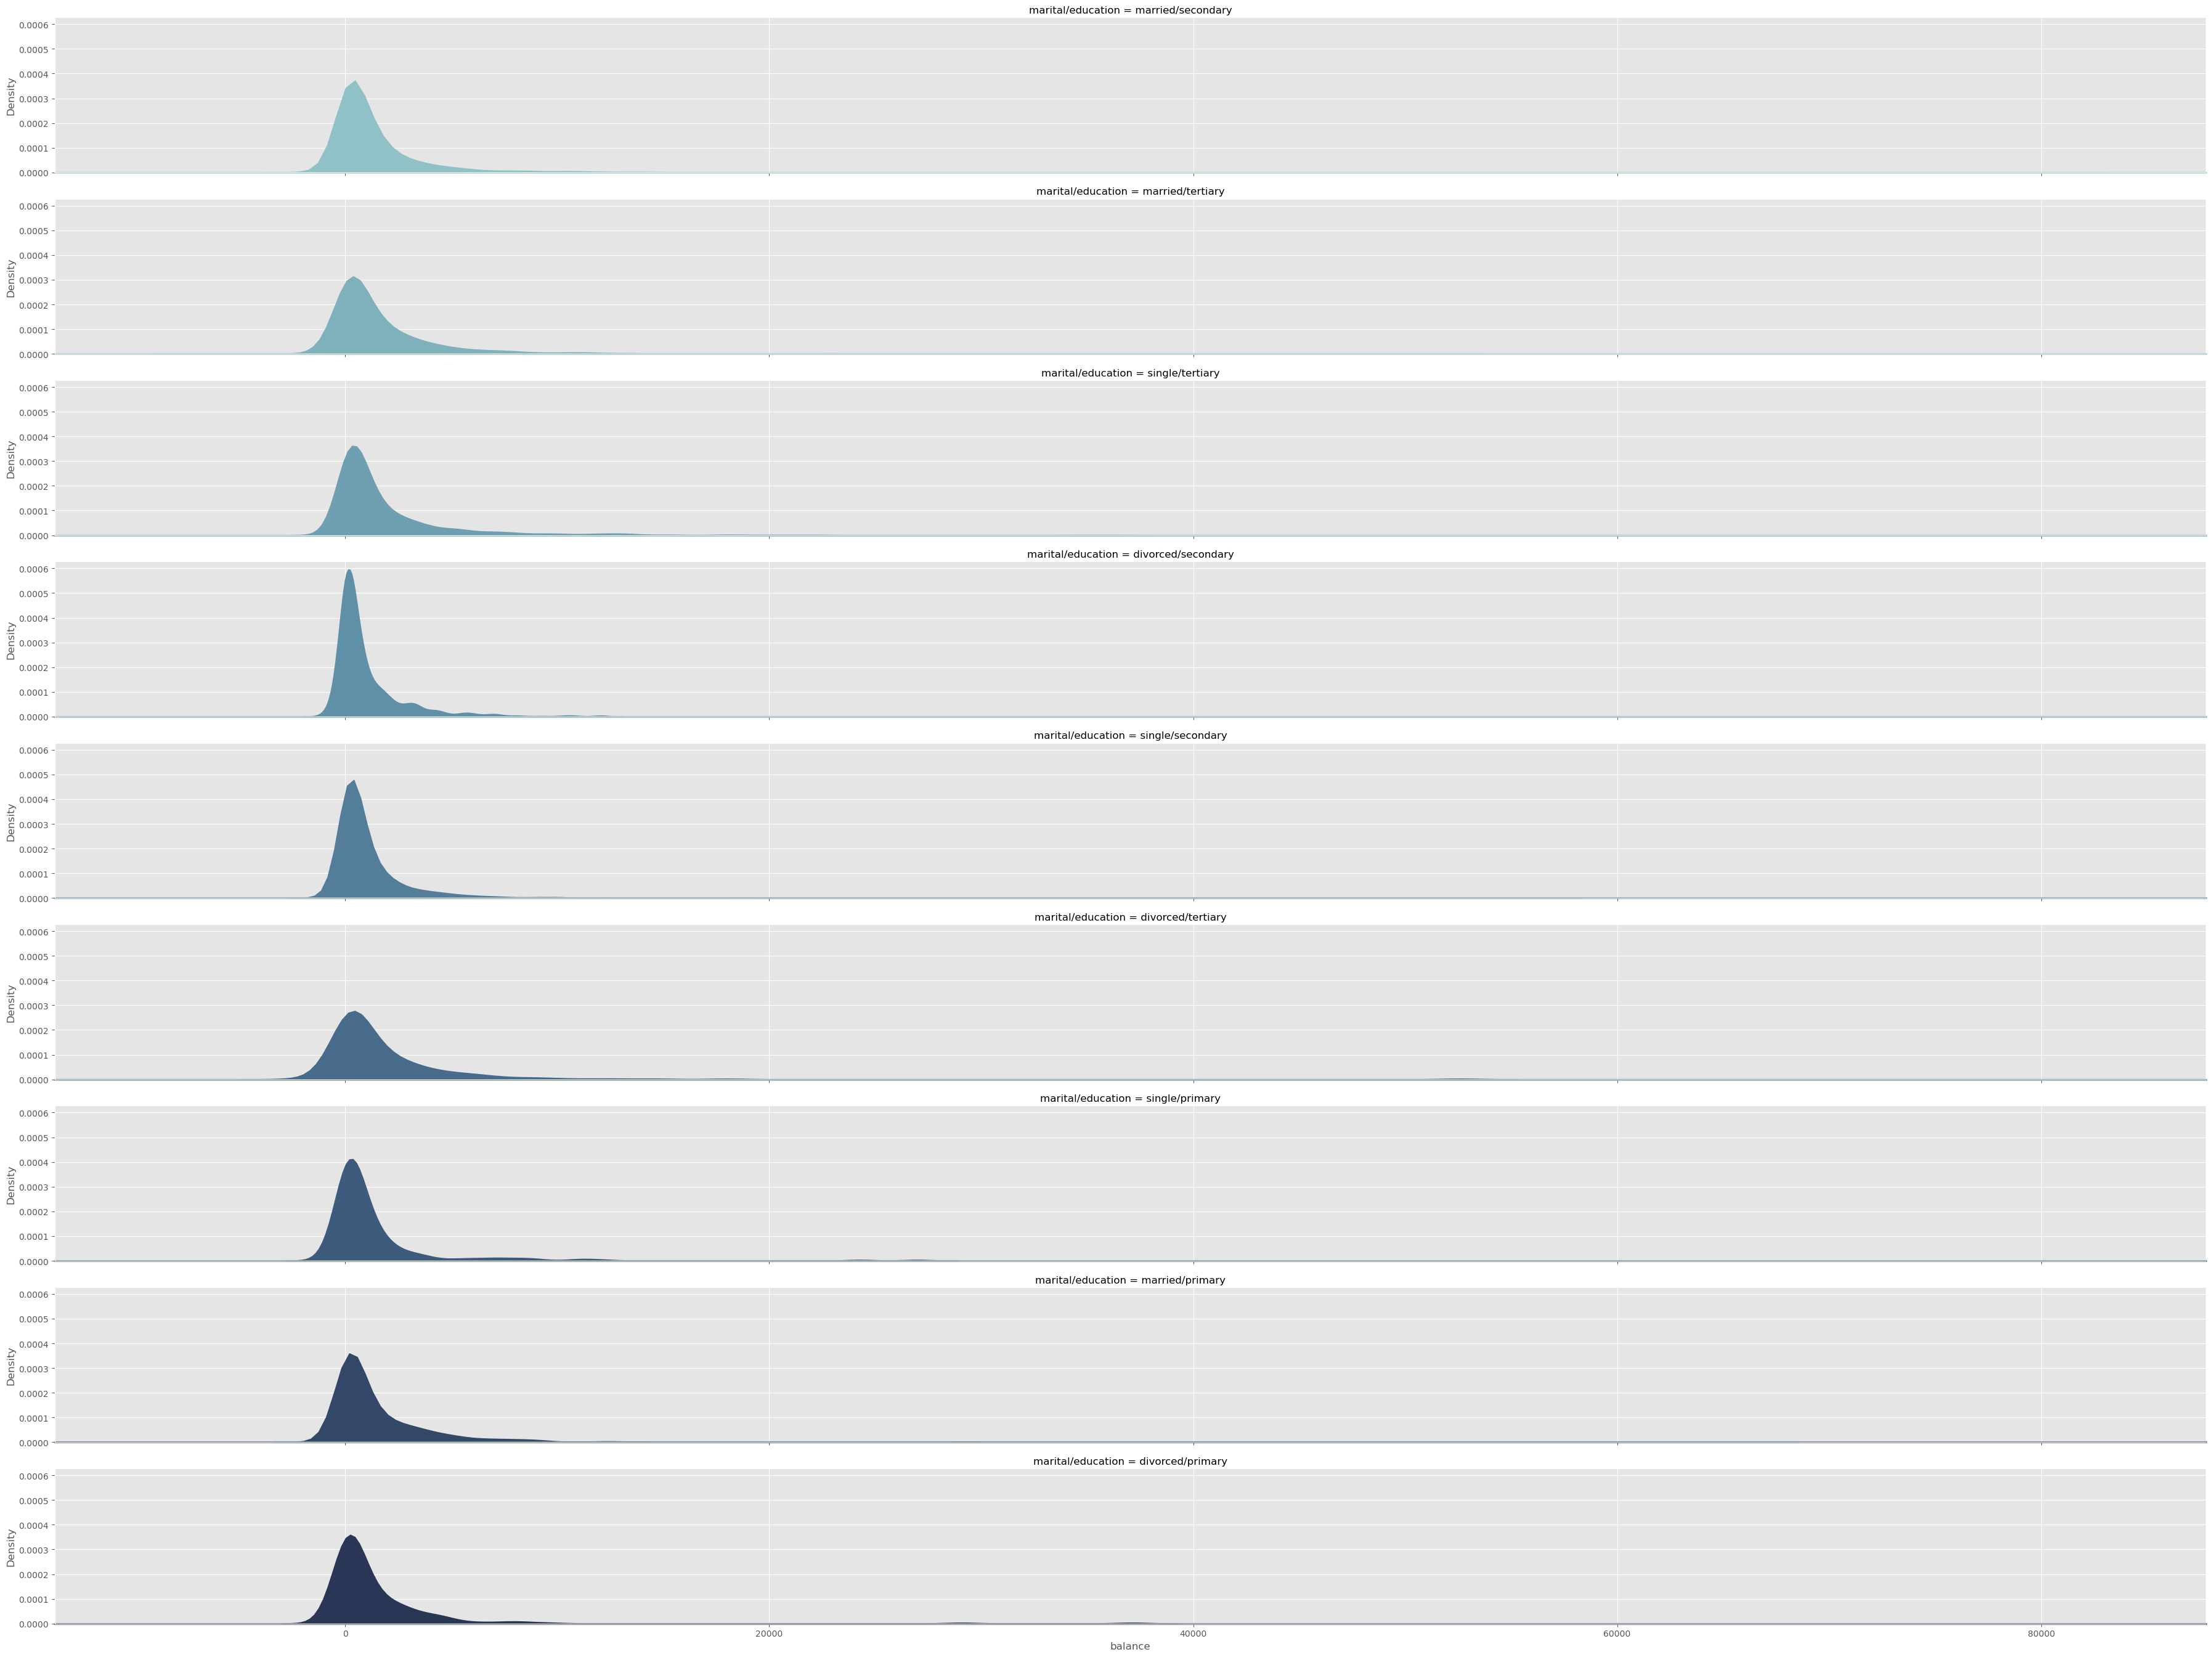

In [60]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_1204\4101742329.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

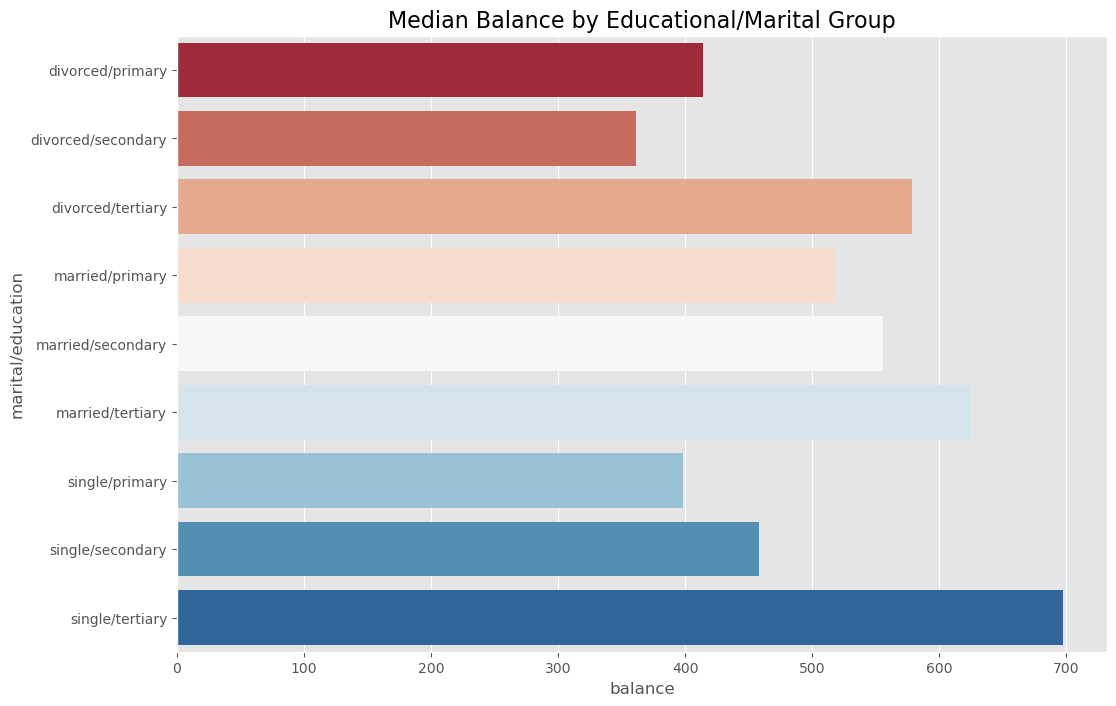

In [61]:
education_groups = data.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [62]:
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may      1042         1     -1         0  unknown     yes   
1    5   may      1467         1     -1         0  unknown     yes   
2    5   may      1389         1     -1         0  unknown     yes   
3    5   may       579         1     -1         0  unknown     yes   
4    5   may       673         2     -1         0  unknown     yes   

   marital/education  
0  married/secondary  
1  married/secondary  
2  married/secondary  
3  married/secondary  
4   married/tertiary

In [63]:
# Let's see the group who had loans from the marital/education group

loan_balance = data.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

In [64]:
data=pd.read_csv("bank.csv")

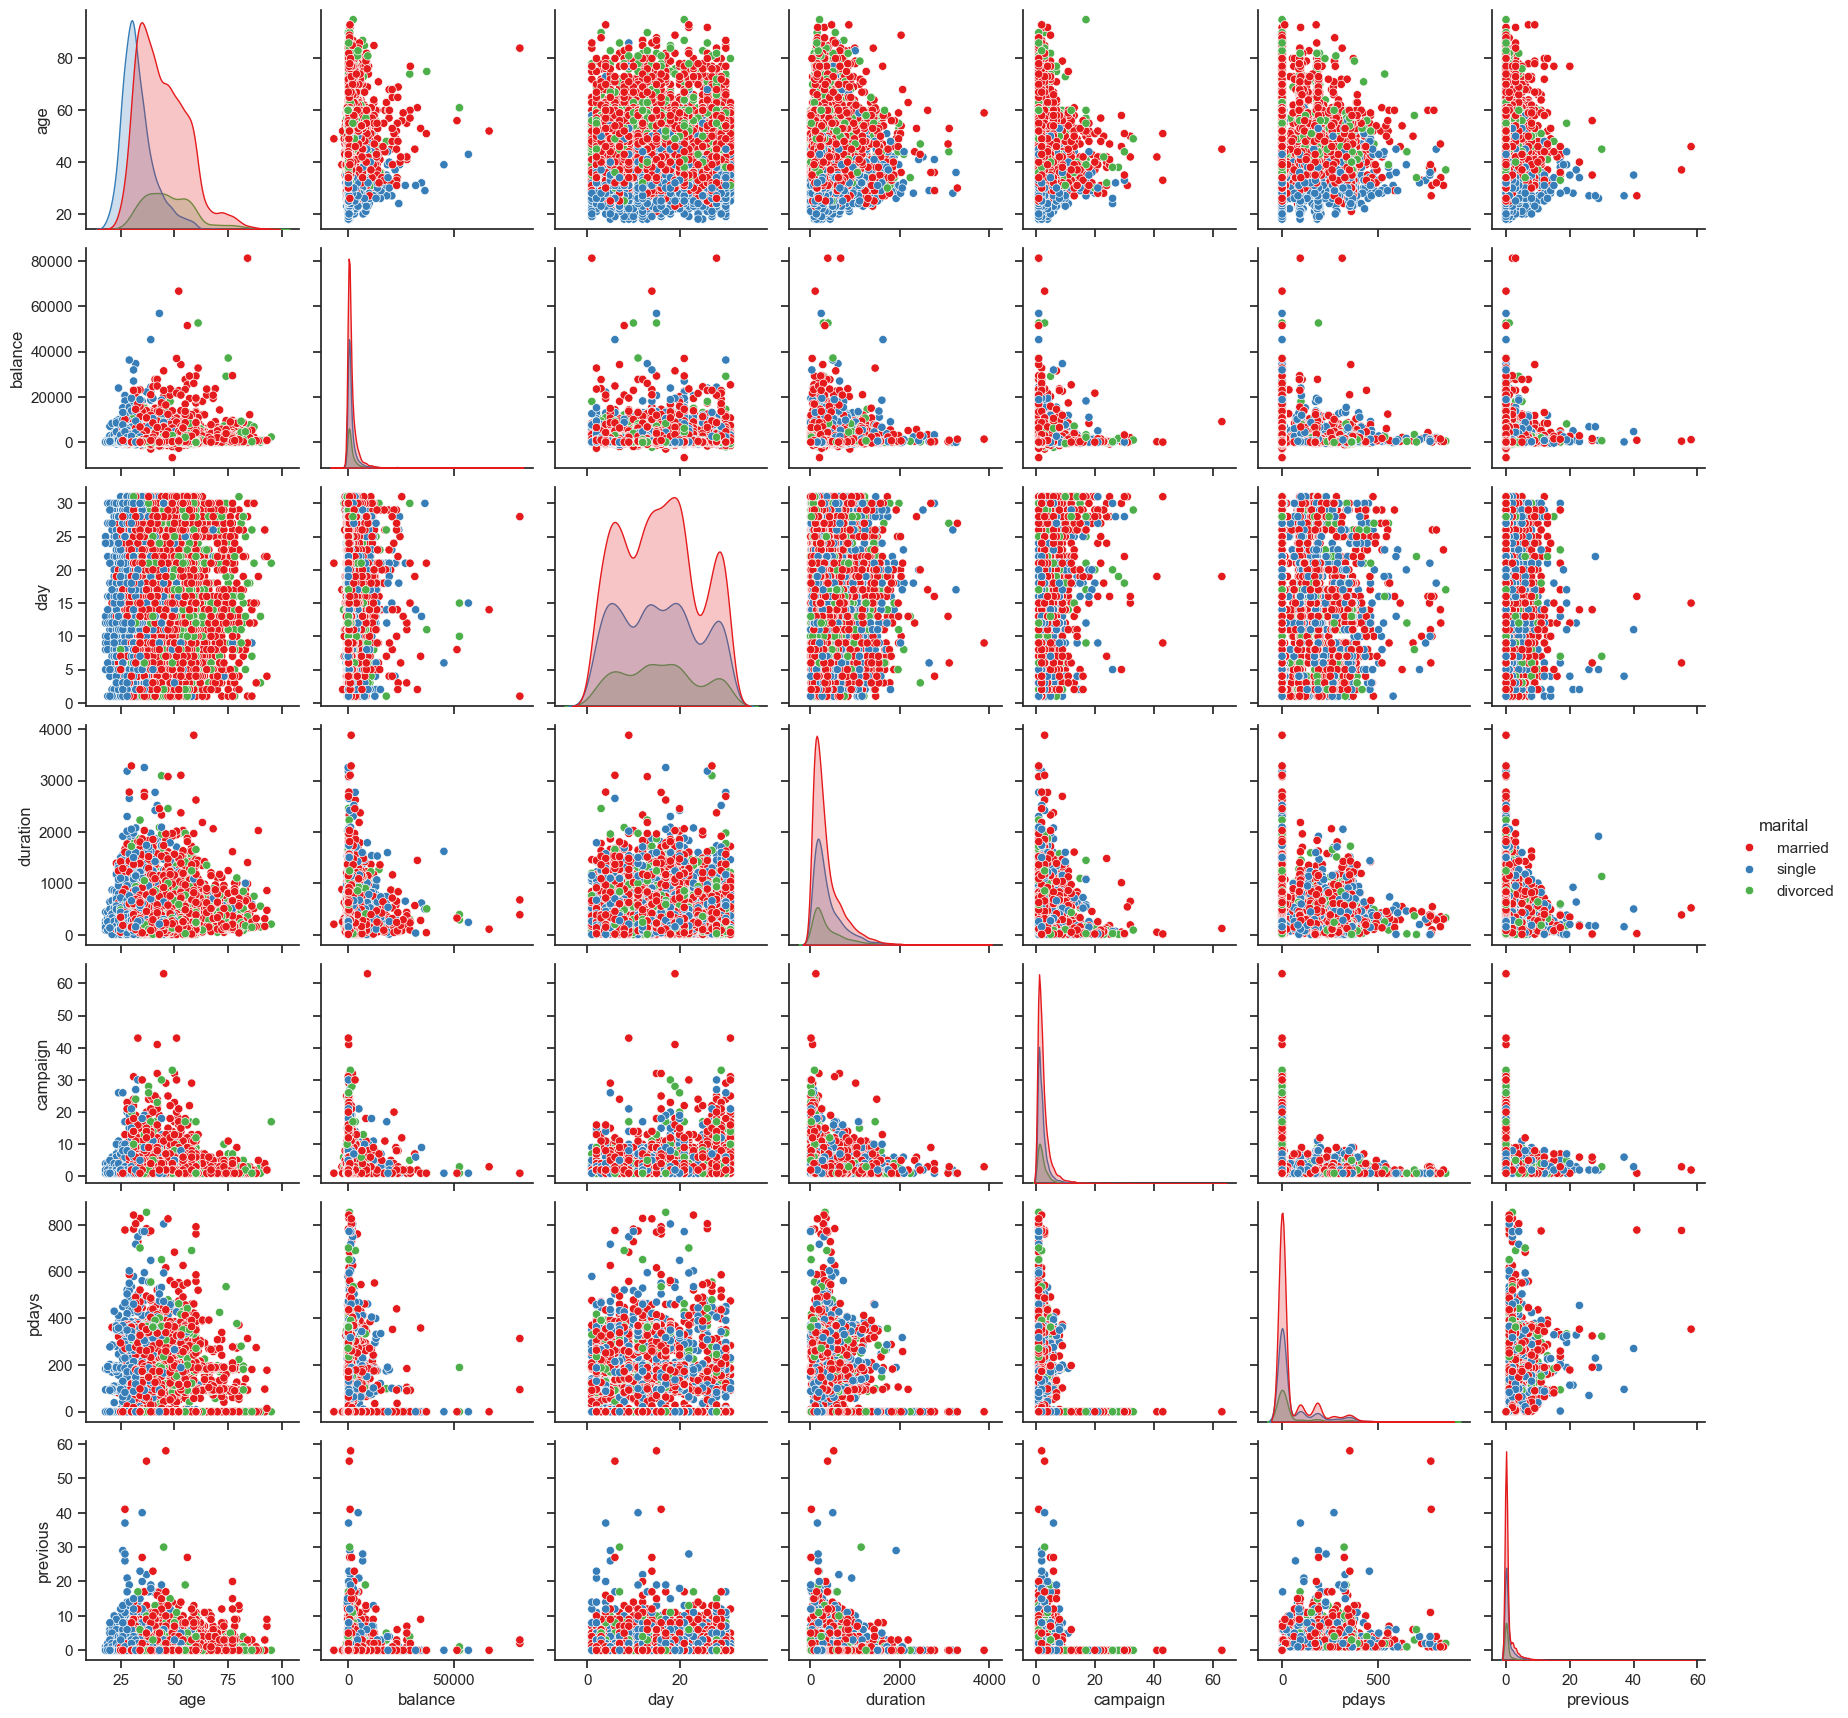

In [70]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data, hue="marital", palette="Set1")
plt.show()

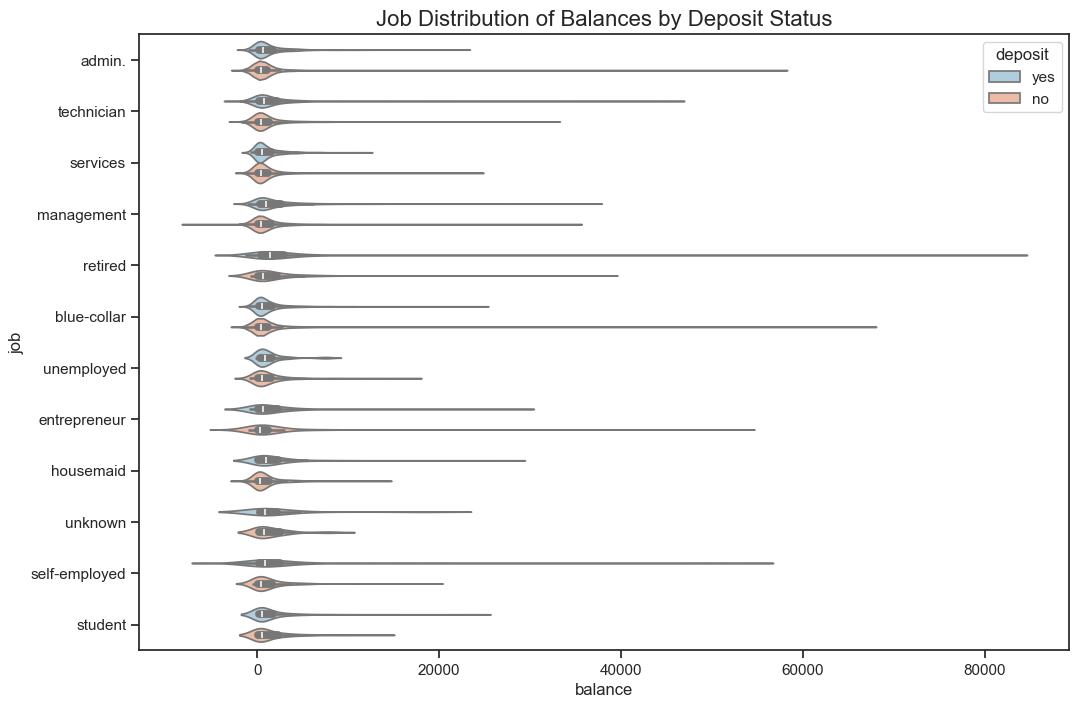

In [71]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=data);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

### Campaign Duration:
Campaign Duration: Hmm, we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
Average Campaign Duration: The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit.
Duration Status: People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

In [73]:
data.drop(['marital', 'balance'], axis=1, inplace=True)

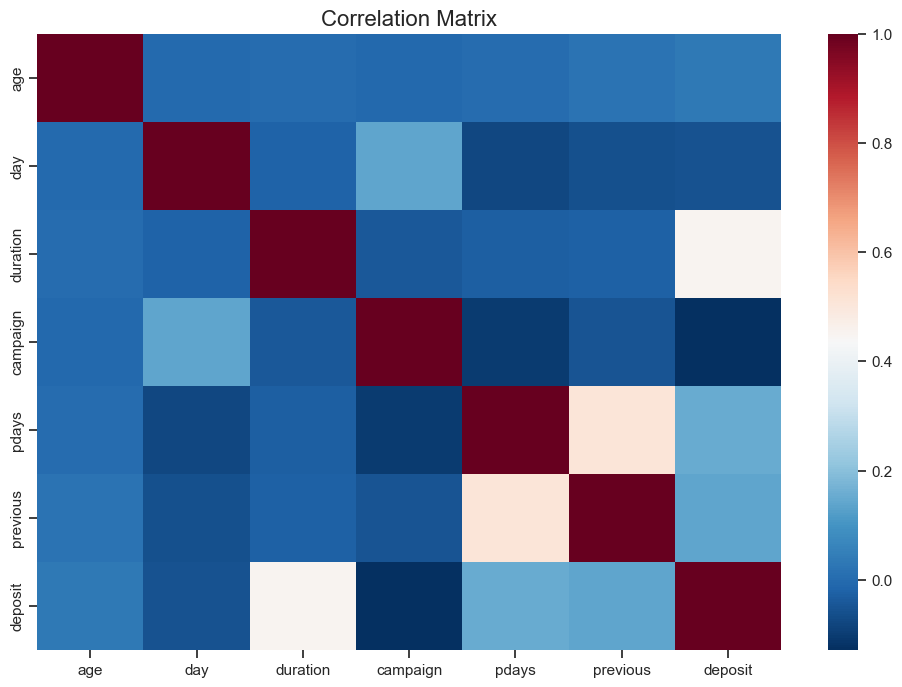

In [74]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
data['deposit'] = LabelEncoder().fit_transform(data['deposit'])



# Separate both dataframes into 
numeric_data = data.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_data.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_1204\1563370933.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'below_average' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



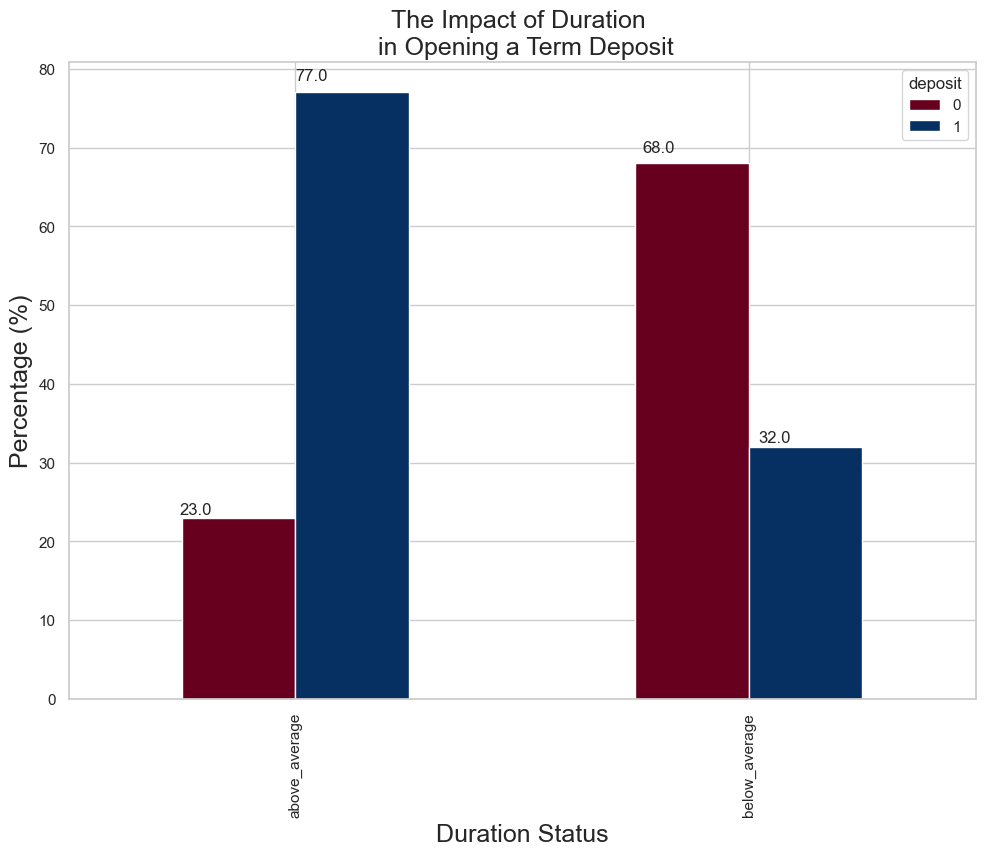

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = data['duration'].mean()

lst = [data]
data["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(data['duration_status'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

### Classification Model:

In [77]:
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1,inplace=True)
term_deposits.insert(0, 'deposit', dep)
term_deposits.head()
# housing has a -20% correlation with deposit let's see how it is distributed.
# 52 %
term_deposits["housing"].value_counts()/len(term_deposits)

housing
no     0.526877
yes    0.473123
Name: count, dtype: float64

In [78]:
term_deposits["loan"].value_counts()/len(term_deposits)

loan
no     0.869199
yes    0.130801
Name: count, dtype: float64

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
stratified_train["loan"].value_counts()/len(data)
stratified_test["loan"].value_counts()/len(data)

loan
no     0.173894
yes    0.026160
Name: count, dtype: float64

In [80]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['deposit'].value_counts()

deposit
no     4697
yes    4232
Name: count, dtype: int64

In [81]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 9867 to 9672
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deposit    8929 non-null   object
 1   age        8929 non-null   int64 
 2   job        8929 non-null   object
 3   marital    8929 non-null   object
 4   education  8929 non-null   object
 5   default    8929 non-null   object
 6   balance    8929 non-null   int64 
 7   housing    8929 non-null   object
 8   loan       8929 non-null   object
 9   contact    8929 non-null   object
 10  day        8929 non-null   int64 
 11  month      8929 non-null   object
 12  duration   8929 non-null   int64 
 13  campaign   8929 non-null   int64 
 14  pdays      8929 non-null   int64 
 15  previous   8929 non-null   int64 
 16  poutcome   8929 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [98]:
print(np.__version__)

1.26.4


In [100]:
train_data = train_data.astype(str)

In [102]:
y_train = train_data['deposit']
y_test = test_data['deposit']
y_train.shape

(8929,)

In [104]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([False, False,  True, ...,  True,  True, False])

In [106]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [109]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(x_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))